In [1]:
#Download the data from the UCI website using urllib 
import urllib 
import numpy as np
url = "https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv"
raw_data = urllib.request.urlopen(url) 
#The file is a CSV, let's read it into a numpy array #Note: not using Pandas to examine/clean the dataset at this point since this dataset is pretty well-cleansed. 
diab = np.genfromtxt(raw_data, delimiter=",") 
print(diab.shape )
#This dataset has 9 columns, 9th one seems to be the labels, 1 or 0 for Diabetes or no Diabetes. 
#Let's split into X,y 
X,y = diab[:,:-1], diab[:,-1:].squeeze() #squeeze to flatten the labels into the vector y 
print(X.shape, y.shape )
#Let's run the train/test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y) 
print(X_train.shape, X_test.shape )

(768, 9)
(768, 8) (768,)
(576, 8) (192, 8)


In [2]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
## 3, 5  n_neighbors=3,
diab_knn = KNeighborsClassifier(n_neighbors=3, algorithm="ball_tree").fit(X_train, y_train) 
y_pred = diab_knn.predict(X_test) 
y_train_pred = diab_knn.predict(X_train) 

#Let's get the score summary 
print("Results with 3 Neighbors" )
print(metrics.classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']) )
print (metrics.classification_report(y_train, y_train_pred, target_names=['No Diabetes', 'Diabetes']))


Results with 3 Neighbors
              precision    recall  f1-score   support

 No Diabetes       0.75      0.81      0.78       121
    Diabetes       0.62      0.54      0.58        71

   micro avg       0.71      0.71      0.71       192
   macro avg       0.69      0.67      0.68       192
weighted avg       0.70      0.71      0.70       192

              precision    recall  f1-score   support

 No Diabetes       0.85      0.91      0.88       379
    Diabetes       0.79      0.70      0.74       197

   micro avg       0.84      0.84      0.84       576
   macro avg       0.82      0.80      0.81       576
weighted avg       0.83      0.84      0.83       576



In [3]:
# Brute Force¶
#  K-D Tree
# Ball Tree

In [5]:
y_pred

array([0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 1.])

In [8]:
diab_knn.score(X,y)

0.8033854166666666

In [12]:
# Create color maps
from matplotlib.colors import ListedColormap
import numpy as np
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
n_neighbors = 15
h = .02  # step size in the mesh
#X,y = diab[:,:-1], diab[:,-1:].squeeze() #squeeze to flatten the labels into the vector y 
#print(X.shape, y.shape )



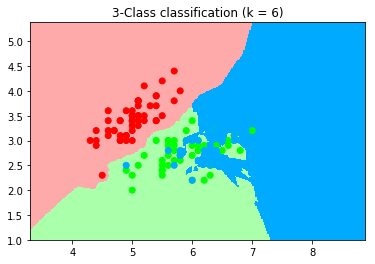

In [22]:
import matplotlib
#matplotlib.use('GTK3Agg')
 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
 
n_neighbors = 6
 
# import some data to play with
iris = datasets.load_iris()
 
# prepare data
X = iris.data[:, :2]
y = iris.target
h = .02
 
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
 
# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)
 
# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
 
# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()

# cairocffi